# Image Segmentation and Connected Components Analysis

In this notebook, we demonstrate an advanced image processing technique involving segmentation of an image into regions, applying Otsu's thresholding method to each region for binarization, and finally identifying connected components within the binarized image. This approach is particularly useful for object detection and counting, showcased here with an example of counting rice grains in an image.

## Importing Necessary Libraries

First, we import the required libraries including `PIL` for image loading and conversion, `numpy` for array manipulation, `matplotlib.pyplot` for visualization, and `scipy.ndimage` for labeling connected components.


In [1]:
# !pip3 install numpy
# !pip3 install matplotlib
# !pip3 install Pillow
# !pip3 install scipy

In [2]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import label

## Loading the Image and Preprocessing

We start by loading the image and converting it to grayscale, which simplifies the application of thresholding and connected component analysis.

In [3]:
# Load the image and convert to grayscale
rice_image_path = './imgs/rice.jpg'  # Ensure the correct image path
rice_image = Image.open(rice_image_path).convert('L')
rice_array = np.array(rice_image)

## Implementing Otsu's Thresholding Method

Otsu's method is a popular thresholding technique that selects the threshold to minimize within-class variance or equivalently, to maximize between-class variance.

In [4]:
def otsu_threshold(region):
    # Calculate the histogram of the image region
    histogram, bin_edges = np.histogram(region, bins=256, range=(0, 255))
    # Normalized histogram and cumulative sums
    histogram_normalized = histogram / histogram.sum()
    cumulative_sum = np.cumsum(histogram_normalized)
    cumulative_mean = np.cumsum(histogram_normalized * np.arange(256))
    global_mean = cumulative_mean[-1]
    # Otsu's thresholding
    otsu_threshold = 0
    max_between_class_variance = 0
    for i in range(1, 256):
        probability_class_1 = cumulative_sum[i]
        probability_class_2 = 1 - probability_class_1
        mean_class_1 = cumulative_mean[i] / probability_class_1 if probability_class_1 > 0 else 0
        mean_class_2 = (global_mean - cumulative_mean[i]) / probability_class_2 if probability_class_2 > 0 else 0
        between_class_variance = probability_class_1 * probability_class_2 * (mean_class_1 - mean_class_2) ** 2
        if between_class_variance > max_between_class_variance:
            max_between_class_variance = between_class_variance
            otsu_threshold = i
    return otsu_threshold

## Segmenting the Image and Applying Thresholds

The image is divided into regions, and Otsu's thresholding is applied to each region to segment the image into binary form.

In [5]:
# Divide the image into regions and apply Otsu's threshold to each
num_regions = 4  # Number of regions in each dimension
segmented_image = np.zeros_like(rice_array)  # Initialize segmented image

for i in range(num_regions):
    for j in range(num_regions):
        # Define region boundaries
        start_x, start_y = i * rice_array.shape[0] // num_regions, j * rice_array.shape[1] // num_regions
        end_x, end_y = (i + 1) * rice_array.shape[0] // num_regions, (j + 1) * rice_array.shape[1] // num_regions
        # Segment region
        region = rice_array[start_x:end_x, start_y:end_y]
        threshold = otsu_threshold(region)
        segmented_image[start_x:end_x, start_y:end_y] = region > threshold

## Labeling Connected Components

After binarization, we apply a connected components algorithm to label each distinct object in the image.

In [6]:
# Apply connected components algorithm on the binarized image
labeled_array, num_features = label(segmented_image)

## Visualizing the Results

Finally, we visualize the original, binarized, and labeled images side by side, highlighting the effectiveness of segmentation and connected components analysis in counting objects like rice grains.

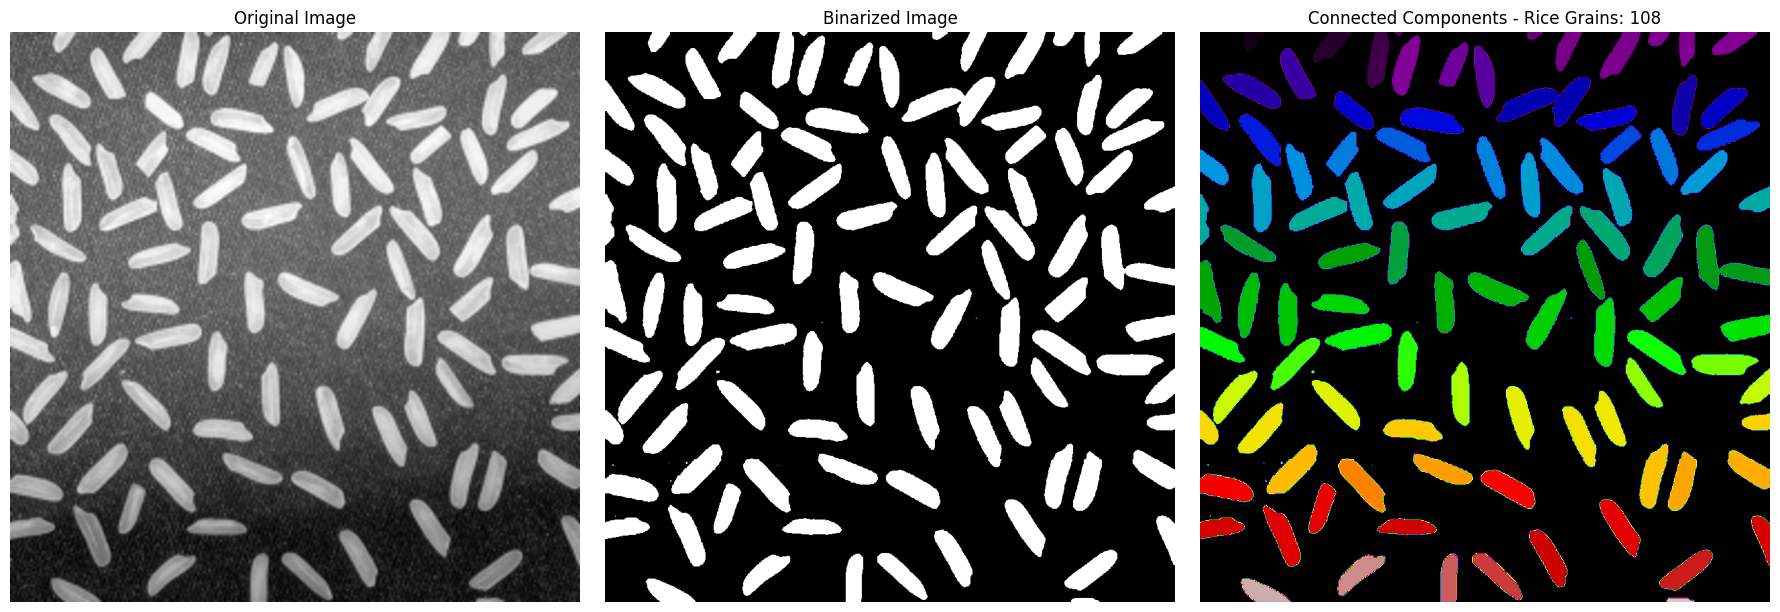

In [7]:
# Plot original, binarized, and labeled images side by side
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

axes[0].imshow(rice_image, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(segmented_image, cmap='gray')
axes[1].set_title('Binarized Image')
axes[1].axis('off')

axes[2].imshow(labeled_array, cmap='nipy_spectral')
axes[2].set_title(f'Connected Components - Rice Grains: {num_features}')
axes[2].axis('off')

plt.tight_layout()
plt.show()